# Analysis and Prediction of Sharing Bikes Rental Count

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [4]:
##importing train and test data

train = pd.read_csv("C:/Users/Lenovo/Downloads/train_bikes.csv")
test = pd.read_csv("C:/Users/Lenovo/Downloads/test_bikes.csv")

In [5]:
##summary about training data

train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [264]:
train['datetime']= pd.to_datetime(train['datetime']) 
test['datetime']= pd.to_datetime(test['datetime']) 

## Getting hour when the bike was rented and storing in column 'hour'
train.loc[:, ('hour')] = train.datetime.dt.hour
test.loc[:, ('hour')] = train.datetime.dt.hour
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


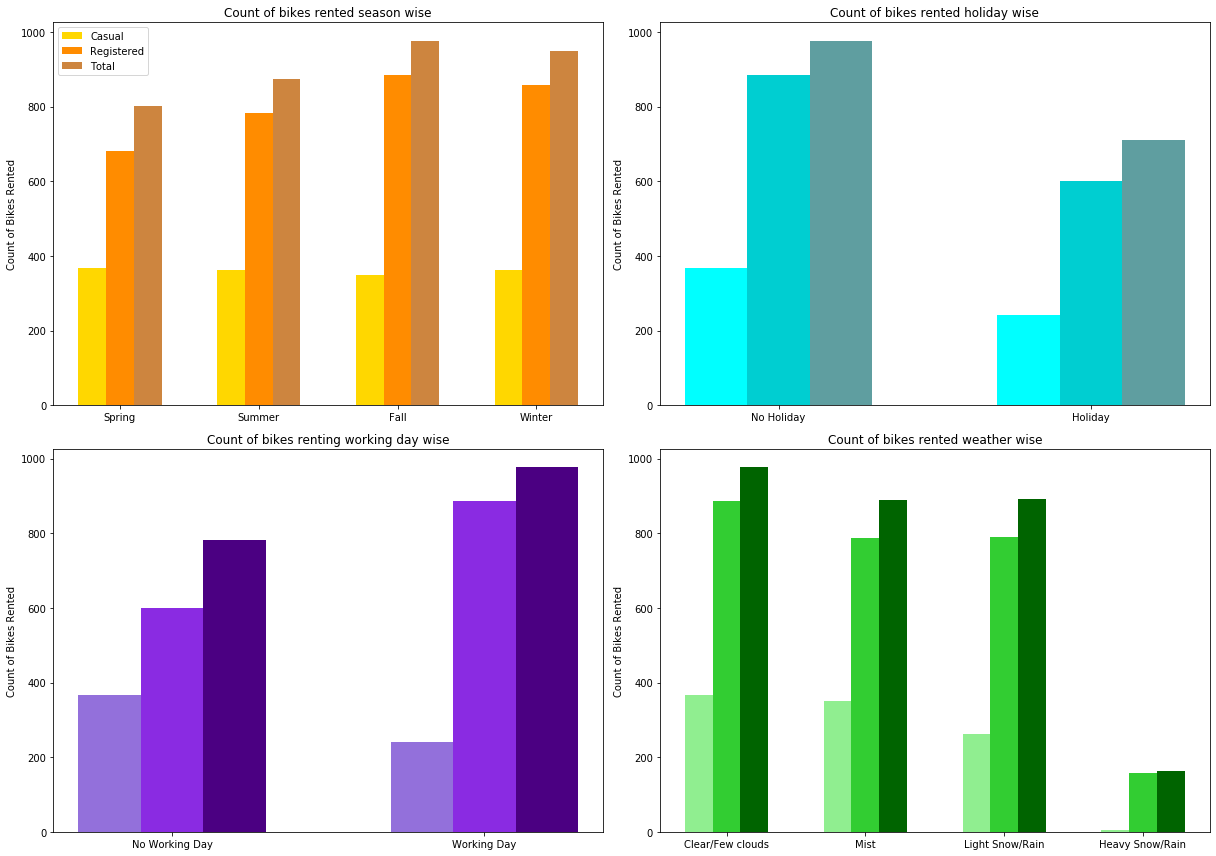

In [262]:
## Visualization of count of rented bikes seasonwise, weatherwise, holidaywise and working daywise
## bar plot contains three bars: casual count(casualy rented bikes), registered count(bikes rented by registered users) and 
## total count of bikes rented

f, axarr = plt.subplots(2, 2, figsize=(17, 12))
bar_width = 0.2

## 1st plot
plt.subplot(2,2,1)
_ = plt.bar(train['season'], train['casual'], bar_width,color='gold',label='Casual')
_ = plt.bar(train['season'] + bar_width, train['registered'], bar_width,color='darkorange',label='Registered')
_ = plt.bar(train['season'] + bar_width + bar_width, train['count'], bar_width,color='peru',label='Total')
plt.title('Count of bikes rented season wise')
plt.ylabel('Count of Bikes Rented')
plt.xticks([1.2,2.2,3.2,4.2], ('Spring', 'Summer', 'Fall', 'Winter'))
plt.legend()

##2nd plot
plt.subplot(2,2,2)
day = ('No Holiday', 'Holiday')
_ = plt.bar(train['holiday'], train['casual'], bar_width,color='aqua',label='Casual')
_ = plt.bar(train['holiday'] + bar_width, train['registered'], bar_width,color='darkturquoise',label='Registered')
_ = plt.bar(train['holiday'] + bar_width + bar_width, train['count'], bar_width,color='cadetblue',label='Total')
_ = plt.title("Count of bikes rented holiday wise")
_ = plt.xticks([0.2,1.2], day)
_ = plt.ylabel('Count of Bikes Rented')

##3nd plot
plt.subplot(2,2,3)
day = ('No Working Day', 'Working Day')
_ = plt.bar(train['workingday'], train['casual'], bar_width,color='mediumpurple',label='Casual')
_ = plt.bar(train['workingday'] + bar_width, train['registered'], bar_width,color='blueviolet',label='Registered')
_ = plt.bar(train['workingday'] + bar_width + bar_width, train['count'], bar_width,color='indigo',label='Total')
_ = plt.title("Count of bikes renting working day wise")
_ = plt.xticks([0.2,1.2], day)
_ = plt.ylabel('Count of Bikes Rented')

## 4st plot
plt.subplot(2,2,4)
weather = ('Clear/Few clouds', 'Mist', 'Light Snow/Rain', 'Heavy Snow/Rain')
_ = plt.bar(train['weather'], train['casual'], bar_width,color='lightgreen',label='Casual')
_ = plt.bar(train['weather'] + bar_width, train['registered'], bar_width,color='limegreen',label='Registered')
_ = plt.bar(train['weather'] + bar_width + bar_width, train['count'], bar_width,color='darkgreen',label='Total')
_ = plt.title("Count of bikes rented weather wise")
_ = plt.xticks([1.2,2.2,3.2,4.2], weather)
_ = plt.ylabel('Count of Bikes Rented')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

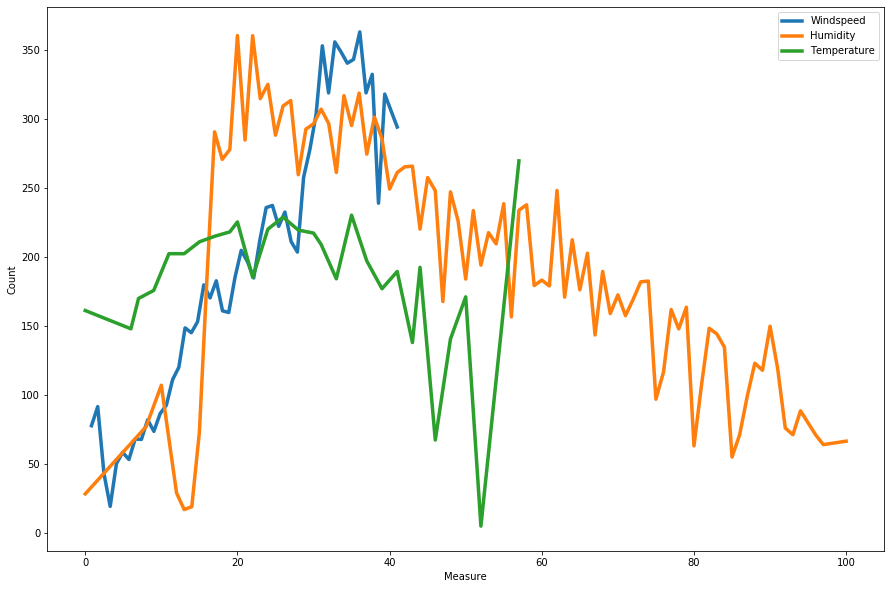

In [200]:
## visualization of count of rented bikes depending on temperature, humidity and windspeed

figure,axes = plt.subplots(figsize = (15, 10))
t =df_copy.groupby(['temp'])['count'].mean()
t.plot(kind="line", ax=axes,linewidth=3.5) 
h =df_copy.groupby(['humidity'])['count'].mean()
h.plot(kind="line", ax=axes,linewidth=3.5) 
w =df_copy.groupby(['windspeed'])['count'].mean()
w.plot(kind="line", ax=axes,linewidth=3.5) 
axes.legend(('Windspeed','Humidity','Temperature'))
plt.xlabel("Measure")
plt.ylabel("Count")

In [245]:
df_copy = train.copy()
#using grouby to extract the count of bike rented hourly
c =df_copy.groupby('hour')[['count']].mean()
c.head()

,count
hour,
0,55.138462
1,33.859031
2,22.899554
3,11.757506
4,6.407240


Text(0, 0.5, 'Count')

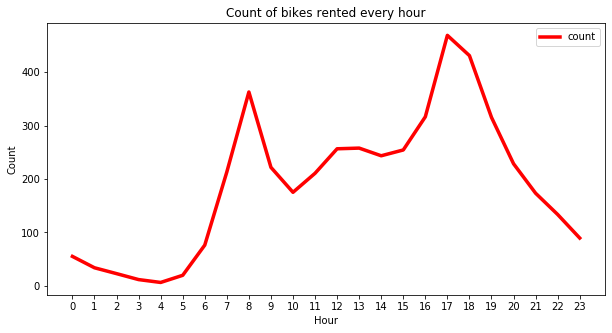

In [246]:
## line graph of count of bikes rented on every hour of day

figure,axes = plt.subplots(figsize = (10, 5))
c.plot(kind="line", ax=axes, color='red',linewidth=3.5) 
plt.title("Count of bikes rented every hour")
plt.xlabel("Hour")
plt.xticks(np.arange(0, 24, step=1))
plt.ylabel("Count")

In [150]:
#using grouby to extract the count of bike rented hourly and seasonwise
df1 =df_copy.groupby(['hour', 'season'])['count'].sum().unstack()
df1.head()

season,1,2,3,4
hour,,,,
0,3197,6666,8627,6598
1,2120,4063,5066,4123
2,1413,2677,3583,2586
3,745,1312,1783,1251
4,337,749,922,824


Text(0, 0.5, 'Count')

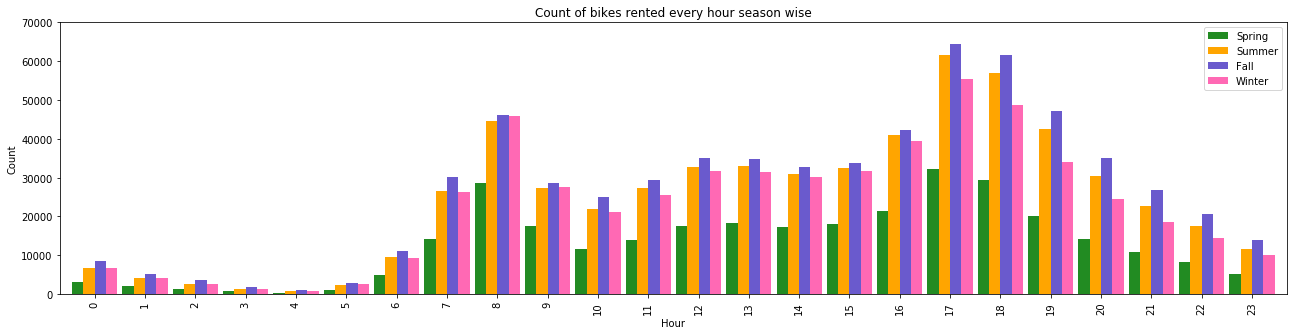

In [193]:
## bar graph of count of bikes rented depending on season and hour of day

df1.plot(kind='bar', ylim=(0, 70000), figsize=(22,5), width=0.9, color=('forestgreen','orange','slateblue','hotpink'))
plt.title("Count of bikes rented every hour season wise")
plt.legend(('Spring','Summer','Fall','Winter'))
plt.xlabel("Hour")
plt.ylabel("Count")

In [152]:
df2 = train.copy()
df2['year'] = df2.datetime.dt.year # extratcing the year
df2['month'] = df2.datetime.dt.month # extratcing the month
#storing year and month info for every sample in a different column 

#using grouby to extract the count of bike rented hourly and yearly 
df2 = df2.groupby(['month', 'year'])['count'].sum().unstack()
df2.head()

year,2011,2012
month,,
1,23552,56332
2,32844,66269
3,38735,94766
4,50517,116885
5,79713,120434


Text(0, 0.5, 'Count')

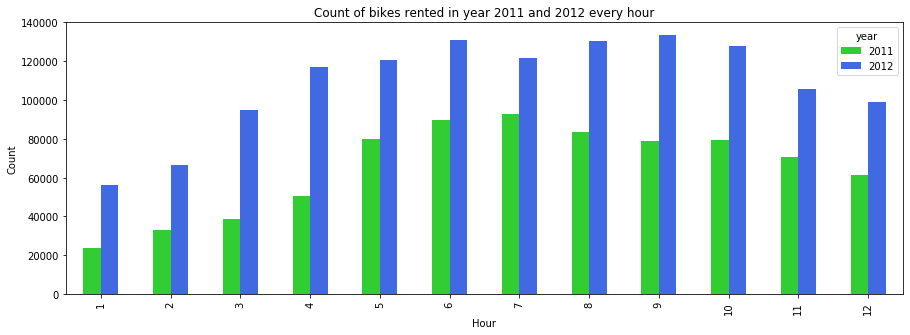

In [184]:
## ar graph of count of bikes rented depending on hour of day in year 2011 and 2012

df2.plot(kind='bar', figsize=(15,5), color=('limegreen','royalblue'))
plt.title("Count of bikes rented in year 2011 and 2012 every hour")
#plt.legend(('Spring','Summer'))
plt.xlabel("Hour")
plt.ylabel("Count")

In [266]:
## creating training and testing data

x_train = train.drop(columns=['datetime','count','casual','registered'])
y_train = train.loc[:,['count']]

x_test = test.drop(columns=['datetime'])

In [267]:
## fitting gradient boosting model
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [268]:
## predicting the total count
y_pred = reg.predict(x_test)
y_pred

array([ 24.0264044 ,  16.28835555,  12.54014517, ..., 131.65139195,
       250.03639363, 250.03639363])

In [269]:
for i in range(len(y_pred)):
    y_pred[i] = round(y_pred[i]) ## round up predicted values
    
x_test['count_pred']=y_pred ## adding predicted values to the x_test dataframe
x_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,count_pred
0,1,0,1,1,10.66,11.365,56,26.0027,0,24.0
1,1,0,1,1,10.66,13.635,56,0.0000,1,16.0
2,1,0,1,1,10.66,13.635,56,0.0000,2,13.0
3,1,0,1,1,10.66,12.880,56,11.0014,3,9.0
4,1,0,1,1,10.66,12.880,56,11.0014,4,9.0
...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,14,105.0
6489,1,0,1,2,10.66,12.880,60,11.0014,15,105.0
6490,1,0,1,1,10.66,12.880,60,11.0014,16,132.0
6491,1,0,1,1,10.66,13.635,56,8.9981,17,250.0


In [270]:
df_copy = x_test.copy()
#using grouby to extract the predicted count of bike rented hourly
m =df_copy.groupby('hour')[['count_pred']].mean()
m.head()

,count_pred
hour,
0,59.547794
1,42.029520
2,30.180451
3,24.000000
4,21.542308


Text(0, 0.5, 'Count')

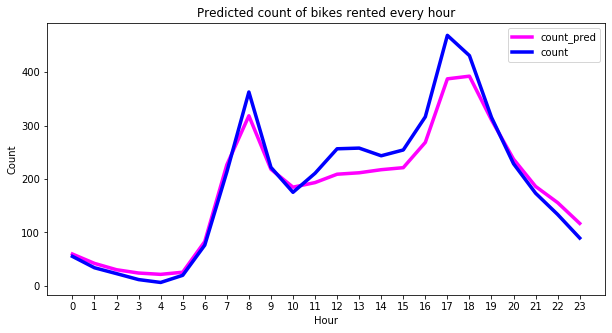

In [271]:
figure,axes = plt.subplots(figsize = (10, 5))
m.plot(kind="line", ax=axes, color='magenta',linewidth=3.5) 
c.plot(kind="line", ax=axes, color='blue',linewidth=3.5) 
plt.title("Predicted count of bikes rented every hour")
plt.xlabel("Hour")
plt.xticks(np.arange(0, 24, step=1))
plt.ylabel("Count")